# Import Package

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import python_anesthesia_simulator as pas
import vitaldb as vdb
import pandas as pd

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

ImportError: numpy.core.multiarray failed to import

# Import data from vitalDB

In [ ]:
case_id = 47 # case id  47
ts = 1 # sampling time in seconds
track_name = ['BIS/BIS', 'Orchestra/PPF20_RATE', 'Orchestra/RFTN20_RATE',
              'Orchestra/PPF20_CE', 'Orchestra/RFTN20_CE', 'Solar8000/ART_MBP',
              'BIS/SQI', 'Solar8000/PLETH_HR', 'Orchestra/PPF20_CP',
              'Orchestra/RFTN20_CP'] # track names to import
case = vdb.VitalFile(case_id, track_name) # load case
case_df = case.to_pandas(track_name, ts) # convert to pandas dataframe
# fill missing values
case_df['Orchestra/PPF20_RATE'].fillna(method='bfill', inplace=True)
case_df['Orchestra/RFTN20_RATE'].fillna(method='bfill', inplace=True)

# Replay input data in the simulator

In [ ]:
perso_data = pd.read_csv("info_clinic_vitalDB.csv", decimal='.')
age = float(perso_data[perso_data['caseid'] == str(case_id)]['age'])
height = float(perso_data[perso_data['caseid'] == str(case_id)]['height'])
weight = float(perso_data[perso_data['caseid'] == str(case_id)]['weight'])
gender = int(perso_data[perso_data['caseid'] == str(case_id)]['sex'] == 'M')  # F = 0, M = 1
Patient_simu = pas.Patient([age, height, weight, gender], ts=ts,
                              model_propo="Marsh_modified", model_remi="Minto")

case_length = case_df.shape[0]
df_results = Patient_simu.full_sim(u_propo = case_df['Orchestra/PPF20_RATE']*20/3600,
                          u_remi = case_df['Orchestra/RFTN20_RATE']*20/3600)


# Plot the results

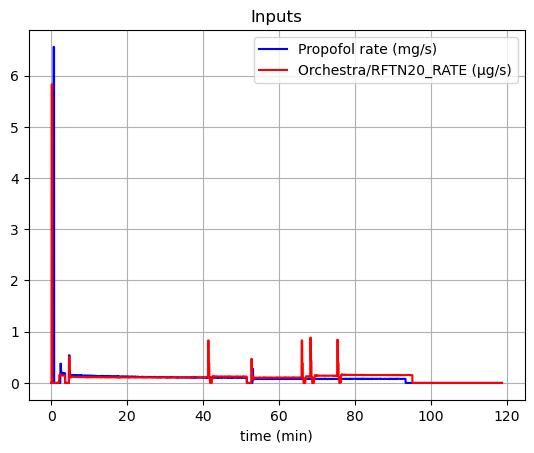

In [ ]:
# plot the inputs
plt.figure()
plt.plot(df_results['Time']/60, case_df['Orchestra/PPF20_RATE']*20/3600,
         'b', label='Propofol rate (mg/s)')
plt.plot(df_results['Time']/60, case_df['Orchestra/RFTN20_RATE']*20/3600,
         'r', label='Orchestra/RFTN20_RATE (µg/s)')
plt.xlabel('time (min)')
plt.title('Inputs')
plt.legend()
plt.grid()
plt.show()


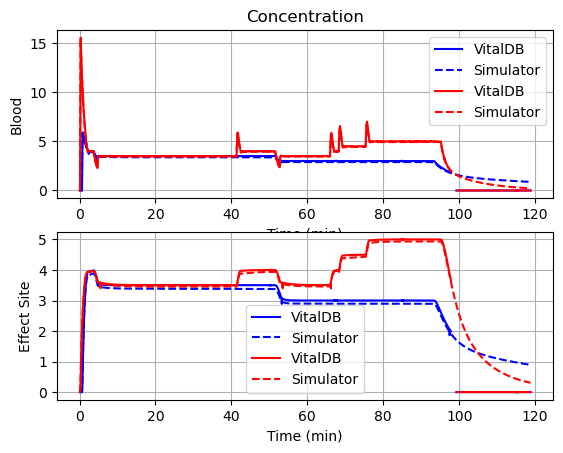

In [ ]:
# plot Propofol Effect site concentration
fig, ax1 = plt.subplots(2)
ax1[0].plot(df_results['Time']/60, case_df['Orchestra/PPF20_CP'], 'b', label='VitalDB')
ax1[0].plot(df_results['Time']/60, df_results['x_propo_1'], 'b--', label='Simulator')
ax1[0].plot(df_results['Time']/60, case_df['Orchestra/RFTN20_CP'], 'r', label='VitalDB')
ax1[0].plot(df_results['Time']/60, df_results['x_remi_1'], 'r--', label='Simulator')
ax1[0].set_xlabel('Time (min)')
ax1[0].set_ylabel('Blood')
ax1[0].legend()
ax1[0].grid()
ax1[1].plot(df_results['Time']/60, case_df['Orchestra/PPF20_CE'], 'b', label='VitalDB')
ax1[1].plot(df_results['Time']/60, df_results['x_propo_4'], 'b--', label='Simulator')
ax1[1].plot(df_results['Time']/60, case_df['Orchestra/RFTN20_CE'], 'r', label='VitalDB')
ax1[1].plot(df_results['Time']/60, df_results['x_remi_4'], 'r--', label='Simulator')
ax1[1].set_xlabel('Time (min)')
ax1[1].set_ylabel('Effect Site')
ax1[0].set_title('Concentration')
ax1[1].legend()
ax1[1].grid()

Both simulation and data from vitalDB are quiet similar. The little difference might came from missing data or 

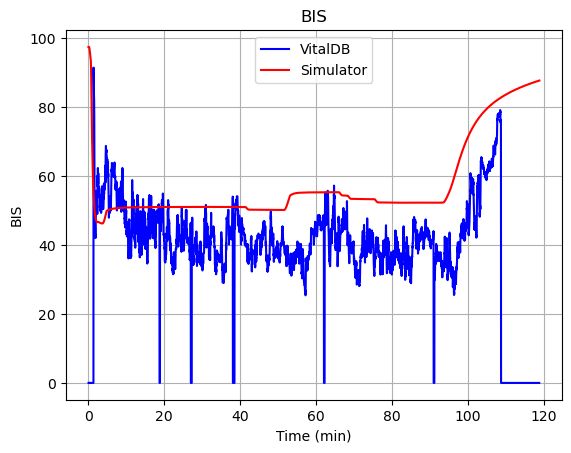

In [ ]:
# plot BIS
plt.figure()
plt.plot(df_results['Time']/60, case_df['BIS/BIS'], 'b', label='VitalDB')
plt.plot(df_results['Time']/60, df_results['BIS'],  'r', label='Simulator')
plt.xlabel('Time (min)')
plt.ylabel('BIS')
plt.title('BIS')
plt.legend()
plt.grid()
plt.show()

Here we observe a huge difference between measured data and simulation. This can be explained by the fact that we are simulating a nominal model while the real patient have a an individual reaction to drug. Moreover the real patient is also subject to disturbance and the measure is subject to noise.